In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class Linear_Regression:
    def __init__(self,numb=1000,learning_rate=0.01):
        self.numb = numb
        self.rate = learning_rate
    def fit(self,x_train,y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)
        self.coffe = np.ones(self.x_train.shape[1])
        self.inter = 0
        self.v_inter = 0
        self.v_coffe = np.zeros(self.x_train.shape[1])
        beta = 0.9
        
        for i in range(self.numb):
            y_hat = np.dot(self.x_train,self.coffe) + self.inter
            intercept_derivative = (-2/(self.x_train.shape[0]))*(np.sum(self.y_train-y_hat))
            cofficenet_derivative = (-2/(self.x_train.shape[0]))*(np.dot((self.x_train.T),(self.y_train-y_hat)))

            self.v_coffe = beta * self.v_coffe + cofficenet_derivative
            self.v_inter = beta * self.v_inter + intercept_derivative

            
            self.inter = self.inter - self.rate*self.v_inter
            self.coffe = self.coffe - self.rate*self.v_coffe
        self.y_hat_pred = np.dot(self.x_train,self.coffe)+self.inter
        return self.inter, self.coffe


    def predict(self,x_test):
        x_test = np.array(x_test)
        self.predict_result = self.inter + np.dot(x_test,self.coffe)
        self.x_test = x_test
        return self.predict_result
    
    
    def r2_score(self,y_pre,y_test):
        
        y_mean = np.mean(y_test)

        ss_r = np.sum((y_test - y_pre)**2)
        ss_m = np.sum((y_test - y_mean)**2)
        
        self.r2 = 1-ss_r/ss_m

        return self.r2
        
    def adjusted_r2_score(self):
        row = self.x_train.shape[0]
        col = self.x_train.shape[1]
        self.adjusted = 1-((1-self.r2)*(row-1)/(row-1-col))
        return self.adjusted

class Scaler:
    def __init__(self):
        self.mean = None
        self.std = None
        
    def scale(self,dataset):
        
        self.mean = dataset.mean()
        self.std = dataset.std()
        
    
    def transform(self,dataset):
        new_dataset = (dataset-self.mean)/(self.std)
        return new_dataset
    
class Bagging_Linear:
    def __init__(self,percent=0.7,lr_count=5,epoch=1000,rate=0.01):
        self.epoch=epoch
        self.rate = rate
        self.count = lr_count
        self.percent = percent
    def fit(self,dataset):
        
        self.dataset = dataset

        bag_item = []

        for i in range(self.count):
            datasets = self.dataset.sample(int(dataset.shape[0]*(self.percent)),random_state=i,replace=True)
            bag_item.append(datasets)

        bag_item_target = []
        for i in range(self.count):
            target_item = bag_item[i]['target']
            bag_item[i]= bag_item[i].drop(columns=['target'])
            bag_item_target.append(target_item)

        self.lr_object = []
        for i in range(self.count):
            lrobject = Linear_Regression(numb=self.epoch,learning_rate=self.rate)
            lrobject.fit(bag_item[i],bag_item_target[i])
            self.lr_object.append(lrobject)
        print("""
        (\__/)
        (^_ ^)
        (>Training Completed
        """)
            
    def bag_predict(self,x_test):
        """
        l1_out = self.l1.predict(x_test)
        l2_out = self.l2.predict(x_test)
        l3_out = self.l3.predict(x_test)
        final_out = (l1_out+l2_out+l3_out)/3
        return final_out"""

        result_out = []
        for i in range(self.count):
            out = self.lr_object[i].predict(x_test)
            result_out.append(out)
        result_sum = 0
        for i in range(self.count):
            result_sum = result_sum+result_out[i]
        
        final_result = result_sum/(self.count)
        return final_result


class Train_test_split:
    def __init__(self,dataset,test_size=0.2,random=1,target='target'):
        self.target = target
        self.random_state=random
        self.test_size=test_size
        self.dataset = dataset
        
        self.row = self.dataset.shape[0]


    def split(self):
        
        np.random.seed(self.random_state)
        row_count = int(self.row*self.test_size)
        value = np.arange(0,self.row)
        row_no = np.random.choice(value,replace=False,size=row_count)
        

        test_dataset = self.dataset.iloc[row_no]
        x_test = test_dataset.drop(columns=[self.target])
        y_test = test_dataset[self.target]

        remaining_row=[]
        for i in range(self.row):
            if i not in row_no:
                remaining_row.append(i)
        train_dataset = self.dataset.iloc[remaining_row]
        x_train = train_dataset.drop(columns=[self.target])
        y_train = train_dataset[self.target]
        
        return x_train,x_test,y_train,y_test
        
                

<>:99: SyntaxWarning: invalid escape sequence '\_'
<>:99: SyntaxWarning: invalid escape sequence '\_'
/var/folders/qx/m587h9hn4155cbn53_ttrdhc0000gn/T/ipykernel_2228/3770081687.py:99: SyntaxWarning: invalid escape sequence '\_'
  (\__/)


In [11]:
def r2_score(y_pre,y_test):
        
    y_mean = np.mean(y_test)

    ss_r = np.sum((y_test - y_pre)**2)
    ss_m = np.sum((y_test - y_mean)**2)
        
    r2 = 1-ss_r/ss_m

    return r2
        

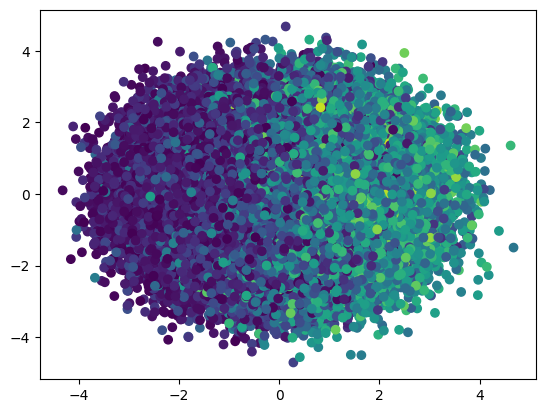

In [7]:
data = pd.read_csv('Linear Regression Train.csv')
target = data.iloc[:,-1]
data = data.iloc[:,:-1]
s = Scaler()
s.scale(data)
data = s.transform(data)
data['target']=target
plt.scatter(data.iloc[:,1],data.iloc[:,2],c=data['target'])

In [8]:

target_col = data.columns[-1]
t=Train_test_split(data,test_size=0.2,target=target_col)
x_train,x_test,y_train,y_test = t.split()

In [9]:
x_train['target']=y_train
lr_bag = Bagging_Linear(percent=0.7,lr_count=5,epoch=1500,rate=0.05)
lr_bag.fit(x_train)
y_pre = lr_bag.bag_predict(x_test)


        (\__/)
        (^_ ^)
        (>Training Completed
        


In [12]:
score = r2_score(y_pre,y_test)

In [13]:
score

np.float64(0.9683169827334559)

In [14]:
test_data = pd.read_csv('Linear Regression Test.csv')
test_data = s.transform(test_data)
predicted_value = lr_bag.bag_predict(test_data)

In [15]:
predicted_value

array([192.83967825,  67.59853329,  41.71036678, ...,  35.16516194,
        35.16782497, 176.68170802], shape=(150000,))

In [16]:
id_ = np.arange(test_data.shape[0])

In [17]:
submit = pd.DataFrame({
    'id':id_,
    'predicted_value' :predicted_value 
})

In [19]:
submit.to_csv('Linear_Submission.csv',index=False)